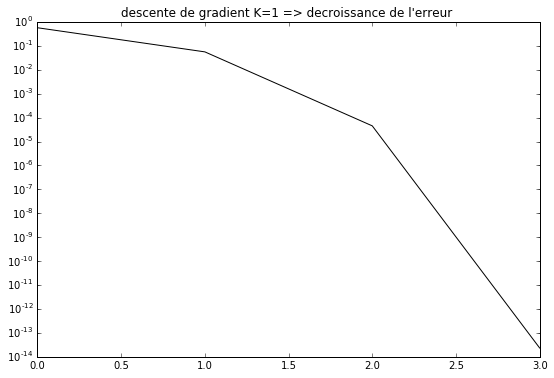

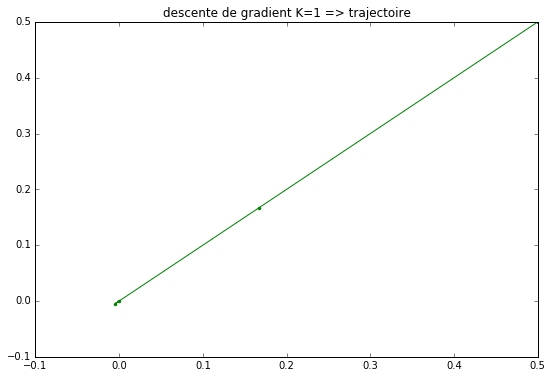

In [13]:
# on importe les modules numpy et pyplot
import numpy as np
import matplotlib.pyplot as plt
# les deux commandes suivante paramètrent l'affichage des figures
%matplotlib inline
plt.rcParams['figure.figsize'] = [9.,6.]

def backtrack(f,x,d,m,alpha=0.3,beta=0.5):
    t = 1
    while f(x+t*d) > f(x) + alpha*t*m:
        t = beta*t
    return t
def gradient_backtracking(f,g,x0,err=1e-6):
    x = x0
    F = []
    X = []
    while(True):
        gx = g(x)
        dx = -gx
        F.append(f(x))
        X.append(x)
        if np.linalg.norm(dx) <= err:
            break
        t = backtrack(f,x,dx,np.dot(gx,dx))
        x = x + t*dx
    return x,np.array(F),np.array(X)
def log(x):
    if x>0:
        return np.log(x)
    else:
        return -float('inf')
            
f = lambda x: - (log(1-x[0]**2) + log(1-x[1]**2))
g = lambda x: np.array([2.*x[0]/((1-x[0]**2)), 2.*x[1]/((1-x[1]**2))])

x0 = np.array([.5,.5])
x,F,X = gradient_backtracking(f,g,x0,err=1e-6)
plt.figure(1)
plt.semilogy(F,'k')
plt.title('descente de gradient K=1 => decroissance de l\'erreur ');
plt.figure(2)
plt.title('descente de gradient K=1 => trajectoire');
plt.plot(X[:,0],X[:,1],'.-g')

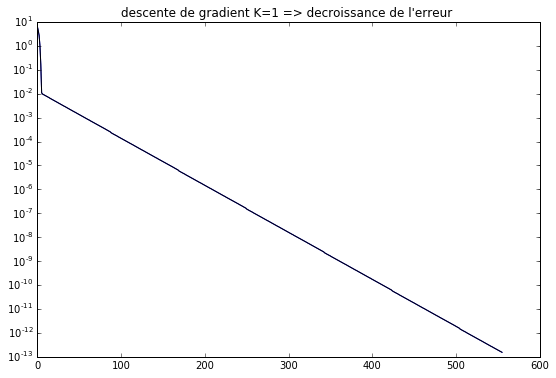

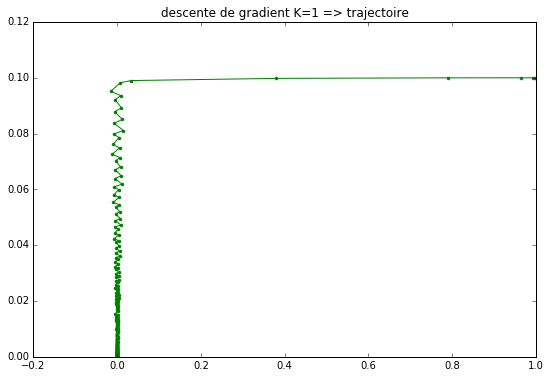

In [9]:
K = 10.
A = np.array([[K,0], [0,1]])
Ainv = np.array([[1./K,0], [0,1]])
x0A = np.dot(Ainv,x0)
fA = lambda x: f(np.dot(A,x))
gA = lambda x: np.dot(A,g(np.dot(A,x)))
#check_gradient(fA,gA,np.dot(Ainv,np.array([.7,.9])))
x,F,X=gradient_backtracking(fA,gA,x0A,err=1e-6)
plt.semilogy(F)
plt.figure(1)
plt.semilogy(F,'k')
plt.title('descente de gradient K=1 => decroissance de l\'erreur ');
plt.figure(2)
plt.title('descente de gradient K=1 => trajectoire');
plt.plot(K*X[:,0],X[:,1],'.-g')

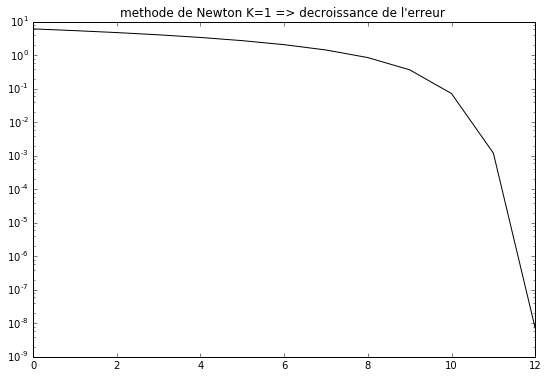

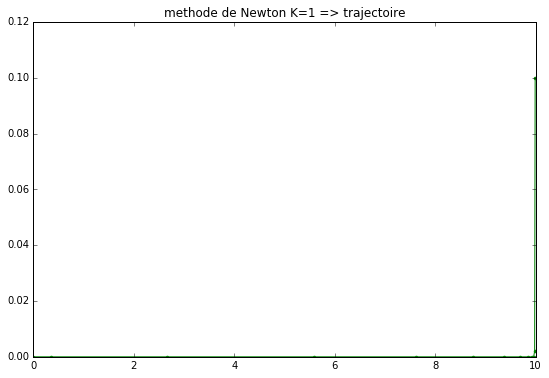

In [11]:
def newton_backtracking(f,g,h,x0,err=1e-6):
    x = x0
    F = []
    X = []
    while(True):
        gx = -g(x)
        dx = np.linalg.solve(h(x),-g(x))
        F.append(f(x))
        X.append(x)
        if np.abs(np.dot(gx,dx)) <= err:
            break
        t = backtrack(f,x,dx,np.dot(gx,dx))
        x = x + t*dx
    return x,np.array(F),np.array(X)

h = lambda x: np.array([[2.*(1+x[0]**2)/((1-x[0]**2)**2),0], [0,2.*(1+x[1]**2)/((1-x[1]**2)**2)]])
hA = lambda x: np.dot(np.dot(A,h(np.dot(A,x))),A)

x,F,X = newton_backtracking(f,g,h,x0,err=1e-6)
plt.figure(1)
plt.semilogy(F,'k')
plt.title('methode de Newton K=1 => decroissance de l\'erreur ');
plt.figure(2)
plt.title('methode de Newton K=1 => trajectoire');
plt.plot(K*X[:,0],X[:,1],'.-g')

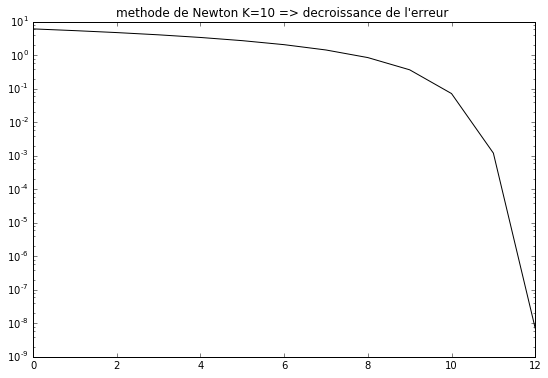

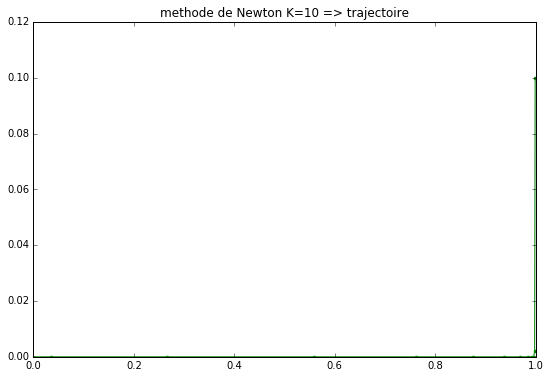

In [12]:
x,F,X = newton_backtracking(fA,gA,hA,x0A,err=1e-6)
plt.figure(1)
plt.semilogy(F,'k')
plt.title('methode de Newton K=10 => decroissance de l\'erreur ');
plt.figure(2)
plt.title('methode de Newton K=10 => trajectoire');
plt.plot(K*X[:,0],X[:,1],'.-g')

In [58]:
# tests
def check_gradient(f,g,x0):
    N = len(x0)
    gg = np.zeros(N)
    for i in range(N):
        eps = 1e-5
        e = np.zeros(N)
        e[i] = eps
        gg[i] = (f(x0+e) - f(x0-e))/(2*eps)
    print('erreur numérique dans le calcul du gradient: %g (doit être petit)' % np.linalg.norm(g(x0)-gg))
def check_hessian(g,h,x0):
    N = len(x0)
    H = np.zeros((N,N))
    for i in range(N):
        eps = 1e-5
        e = np.zeros(N)
        e[i] = eps
        H[i,:] = (g(x0+e) - g(x0-e))/(2*eps)
    print(H)
    print(h(x0))

check_gradient(f,g,np.array([.7,.9]))
check_hessian(g,h,np.array([.7,.9]))
check_hessian(gA,hA,np.array([.07,.9]))


erreur numérique dans le calcul du gradient: 3.33175e-08 (doit être petit)
[[  11.45713188    0.        ]
 [   0.          100.27700931]]
[[  11.45713187    0.        ]
 [   0.          100.27700831]]
[[ 1145.71331081     0.        ]
 [    0.           100.27700931]]
[[ 1145.71318724     0.        ]
 [    0.           100.27700831]]
